### Create a CNN model for image classification using Keras

In [17]:
# import modules

import os
from skimage.io import imread
import skimage
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import cv2
import random


from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras import backend as K
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [18]:
# calculate image file paths

ROOT_PATH = 'D:/AI/Data/fracture'

training_path = os.path.join(ROOT_PATH, 'training')
testing_path = os.path.join(ROOT_PATH, 'testing')

fname = []
for root,d_names,f_names in os.walk(training_path):
    for f in f_names:
        fname.append(os.path.join(root, f))

# shuffle image list
random.shuffle(fname)

# prepare images

nrows = 150
ncolumns = 150
channels = 3

def read_and_process_image(list_of_images):
    X = [] # images
    y = [] # labels

    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR),(nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'XR_ELBOW' in image:
            y.append(0)
        elif 'XR_FINGER' in image:
            y.append(1)
        elif 'XR_FOREARM' in image:
            y.append(2)
        elif 'XR_HAND' in image:
            y.append(3)
        elif 'XR_HUMERUS' in image:
            y.append(4)
        elif 'XR_SHOULDER' in image:
            y.append(5)
        elif 'XR_WRIST' in image:
            y.append(6)
    return X,y


In [19]:
len(fname)

9331

In [20]:
# Feature and target variable

X, y = read_and_process_image(fname)

# Convert list into numpy arroys

X = np.array(X)
y = np.array(y)

In [22]:
# get the count of unique values of classes
# total 8359 valus : 0 - 2618
#                    1 - 2698
#                    2 - 973
#                    3 - 3042

unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1    2    3]
 [2618 2698  973 3042]]


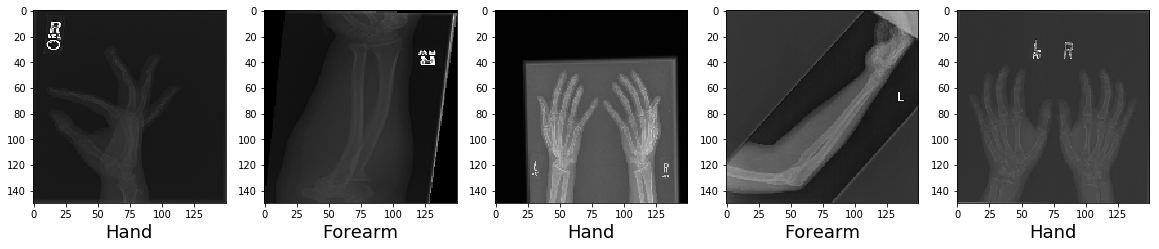

In [24]:
# verify the images have been loaded properly
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns +1, columns, i+1)
    plt.imshow(X[i])
    if y[i] == 0:
        plt.xlabel('Elbow', fontsize=18)
    elif y[i] == 1:
        plt.xlabel('Finger', fontsize=18)
    elif y[i] == 2:
        plt.xlabel('Forearm', fontsize=18)
    elif y[i] == 3:
        plt.xlabel('Hand', fontsize=18)

In [25]:
# Print the shape of total data

print(X.shape)
print(y.shape)

(9331, 150, 150, 3)
(9331,)


In [29]:
# split the data into training and testing datasets

from keras.utils import to_categorical
y = to_categorical(y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [30]:
# print traing and testing datasets shape

print(X_train.shape)
print(y_train.shape)

print('\n')

print(X_test.shape)
print(y_test.shape)


(7464, 150, 150, 3)
(7464, 4)


(1867, 150, 150, 3)
(1867, 4)


In [35]:
# dimensions of our images.
#img_width, img_height = 150, 150

# create a function for classification
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
  
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dense(4, activation='softmax'))
  


In [33]:
# create image augmentation objectd to quickly convert images into tensors

train_datagen = ImageDataGenerator( rescale = 1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator( rescale=1./255)

In [34]:
# create image generator

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

test_generator = train_datagen.flow(X_test, y_test, batch_size=batch_size)

In [36]:
# compile model

epochs = 50
batch_size = 32

model.compile(loss='categorical_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['accuracy'])


# create history generator



history = model.fit_generator(train_generator, steps_per_epoch= X_train.shape[0] // batch_size,
                             epochs=50,
                             validation_data= test_generator,
                             validation_steps= X_test.shape[0] // batch_size)
  

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
233/233 [==============================] - 251s 1s/step - loss: 1.2420 - acc: 0.4355 - val_loss: 1.1781 - val_acc: 0.5108
Epoch 2/50
233/233 [==============================] - 252s 1s/step - loss: 1.0939 - acc: 0.5518 - val_loss: 1.0805 - val_acc: 0.5728
Epoch 3/50
233/233 [==============================] - 208s 892ms/step - loss: 0.9686 - acc: 0.6284 - val_loss: 0.8771 - val_acc: 0.6670
Epoch 4/50
233/233 [==============================] - 187s 802ms/step - loss: 0.8720 - acc: 0.6613 - val_loss: 0.7954 - val_acc: 0.7046
Epoch 5/50
233/233 [==============================] - 187s 804ms/step - loss: 0.8057 - acc: 0.6915 - val_loss: 0.8231 - val_acc: 0.6807
Epoch 6/50
233/233 [==============================] - 185s 793ms/step - loss: 0.7550 - acc: 0.7082 - val_loss: 0.7256 - val_acc: 0.7302
Epoch 7/50
233/233 [==============================] - 182s 780ms/step - loss: 0.7104 - acc: 0.7281 - val_loss: 0.6785 - val_acc: 0.7275
Epoch 

KeyboardInterrupt: 

In [ ]:
#X_train = X_train.reshape(-1,150, 150, 3)   #Reshape for CNN -  should work!!
#X_val = X_val.reshape(-1,150, 150, 3)
#X_test = X_test.reshape(-1,150, 150, 3)

#model.compile(loss='binary_crossentropy', optimizer= optimizers.RMSprop(lr = 1e-4), metrics=['acc'])

#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
                   #validation_data=(X_test, y_test))
  
#model.evaluate(X_test, y_test)


In [37]:
model.save('DLMulticlass.h5')
print('Saved model to disk')

Saved model to disk


Text(0.5, 1.0, 'Accuracy Curves')

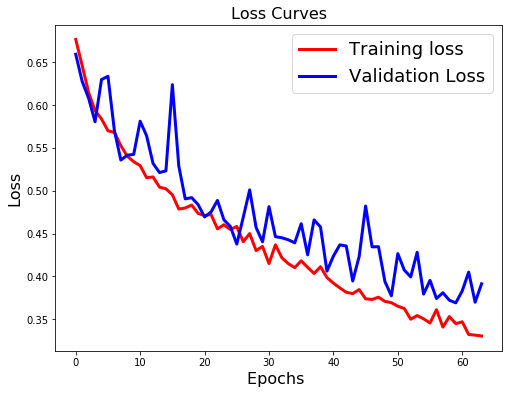

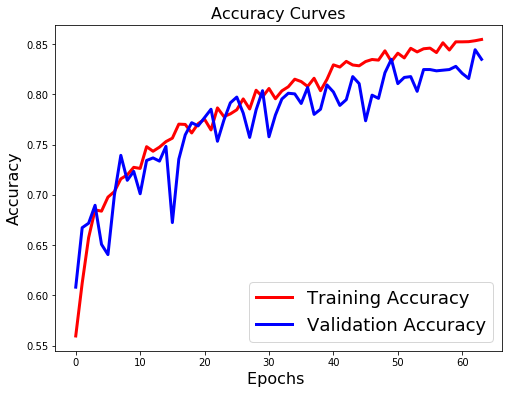

In [41]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

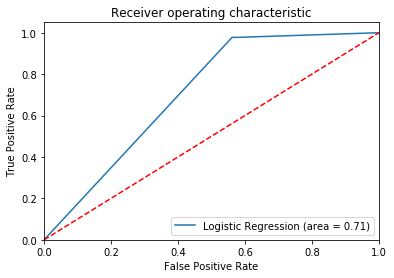

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()